In [2]:
import sqlite3
import pandas as pd
from datetime import datetime

# Connect to the SQLite database
conn = sqlite3.connect('job_listings.db')

# Read the job listings table into a DataFrame
df = pd.read_sql_query("SELECT * FROM job_listings", conn)
df.sort_values('created_at')
display(df)

conn.close()

,id,title,company,location,published,salary,summary,link,description,sponsorship_checked,candidate_fit_checked,inactive,created_at
0,561eaa18e1567173,Computer Science Full Time Permanent NEW - Phi...,Philosophy Education,London,"Mon, 03 Jun 2024 12:02:44 GMT",None,In this role you will be teaching computer sci...,https://uk.indeed.com/viewjob?t=Computer+Scien...,Job details\nHere’s how the job details align ...,0,0,1,2024-06-03 11:41:40
1,b511483cd2ce72ce,Chemistry Teacher Full Time Permanent NEW - Ph...,Philosophy Education,London,"Mon, 03 Jun 2024 12:02:46 GMT",None,The school also offers a BTEC in applied scien...,https://uk.indeed.com/viewjob?t=Chemistry+Teac...,Job details\nHere’s how the job details align ...,0,0,1,2024-06-03 11:41:46
2,e36c723268dd9dee,SOFTWARE ENGINEER - Vortech Solutions - London,Vortech Solutions,London,"Mon, 03 Jun 2024 10:35:40 GMT",None,We have some of the most exciting information ...,https://uk.indeed.com/viewjob?t=Software+Engin...,Location\nLondon\n&nbsp;\nFull job description...,0,0,1,2024-06-03 11:41:52
3,cfca04812fadcb51,Product Solution Architect (CDN+VOD) - Tencent...,Tencent,London,"Mon, 03 Jun 2024 06:26:26 GMT",None,Tencent is a leading global technology company...,https://uk.indeed.com/viewjob?t=Product+Soluti...,Job details\nHere’s how the job details align ...,0,0,1,2024-06-03 11:42:01
4,42f20238c370cabb,Product Manager - Trading - Keyrock - London,Keyrock,London,"Sun, 02 Jun 2024 00:26:32 GMT",None,We&apos;re seeking a dedicated Product Manager...,https://uk.indeed.com/viewjob?t=Product+Manage...,Job details\nHere’s how the job details align ...,0,0,1,2024-06-03 11:42:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,247879b4cc47394f,Cloud & Security Architect - Fourth Ltd - London,Indeed,London,"Mon, 24 Jun 2024 15:52:25 GMT",None,Experience with cloud security measures and be...,https://uk.indeed.com/viewjob?t=Cloud+%26+Secu...,Job details\nHere’s how the job details align ...,0,0,0,2024-06-25 16:26:22
3082,2a84b80e407ba4e4,IAM Engineer - Alcority - London,Alcority,London,"Mon, 24 Jun 2024 22:31:31 GMT",None,Experience with other cloud providers such as ...,https://uk.indeed.com/viewjob?t=Iam+Engineer&c...,Job details\nHere’s how the job details align ...,0,0,0,2024-06-25 16:26:26
3083,c5c709cdd5be742e,"Senior Solutions Architect, Healthcare and Lif...",Amazon.com,London,"Mon, 24 Jun 2024 21:57:02 GMT",None,"Bachelor&apos;s degree in computer science, en...",https://uk.indeed.com/viewjob?t=Senior+Solutio...,Job details\nHere’s how the job details align ...,0,0,0,2024-06-25 16:26:30
3084,7b4799e8a0fdd222,Infrastructure Engineer - Every Cure - London,Every Cure,London,"Mon, 24 Jun 2024 20:40:53 GMT",None,~3+ years in infrastructure or cloud engineeri...,https://uk.indeed.com/viewjob?t=Infrastructure...,Location\nLondon\n&nbsp;\nFull job description...,0,0,0,2024-06-25 16:26:34


In [1]:
from seleniumbase import SB
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Indeed job search URL
url = "https://uk.indeed.com/jobs?q=computer+science&l=London%2C+Greater+London&sort=date"

# List to store job links
job_links = []

# Use SeleniumBase to scrape job links
with SB(uc=True) as sb:
    sb.open(url)
    
    # Wait for the job cards to load
    WebDriverWait(sb.driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "ul.css-zu9cdh"))
    )
    
    # Find all job cards
    job_cards = sb.find_elements("css selector", "div[class*='job_seen_beacon']")
    
    # Extract links from each job card
    for card in job_cards:
        try:
            link_element = card.find_element(By.CSS_SELECTOR, "a[id^='job_']")
            job_id = link_element.get_attribute('id').split('_')[1]
            full_link = f"https://uk.indeed.com/viewjob?jk={job_id}"
            job_links.append(full_link)
        except Exception as e:
            print(f"Error extracting link: {e}")

# Print the list of job links
print("\nJob Links:")
for link in job_links:
    print(link)

print(f"\nTotal jobs found: {len(job_links)}")


Job Links:
https://uk.indeed.com/viewjob?jk=55231065c6291c4f
https://uk.indeed.com/viewjob?jk=8165d80565d330ce
https://uk.indeed.com/viewjob?jk=75f204aff5d1d69d
https://uk.indeed.com/viewjob?jk=f77d022802bae28d
https://uk.indeed.com/viewjob?jk=6e18e4d9adfcd806
https://uk.indeed.com/viewjob?jk=13c0bfcb8419a982
https://uk.indeed.com/viewjob?jk=6706670abfde3b0e
https://uk.indeed.com/viewjob?jk=5e70ca4f210b3d41
https://uk.indeed.com/viewjob?jk=0714b092f61be285
https://uk.indeed.com/viewjob?jk=3a09f15779cec64a
https://uk.indeed.com/viewjob?jk=c2c2a4be2d4dbd40
https://uk.indeed.com/viewjob?jk=8d4164cafedcde6c
https://uk.indeed.com/viewjob?jk=b48c7b76a73865d1
https://uk.indeed.com/viewjob?jk=167495f7e6afd9b2
https://uk.indeed.com/viewjob?jk=024facf06ae4bafc

Total jobs found: 15


100%|██████████| 1000000/1000000 [00:00<00:00, 1229472.61it/s]


Mean wait time: 9.40 seconds
Median wait time: 7.15 seconds
Standard deviation: 7.48 seconds
Minimum wait time: 0.00 seconds
Maximum wait time: 36.88 seconds
Probability of wait time between 0 and 1 seconds: 3.82%
Probability of wait time between 1 and 5 seconds: 31.68%
Probability of wait time between 5 and 10 seconds: 24.05%
Probability of wait time between 10 and 20 seconds: 28.84%
Probability of wait time between 20 and inf seconds: 11.60%


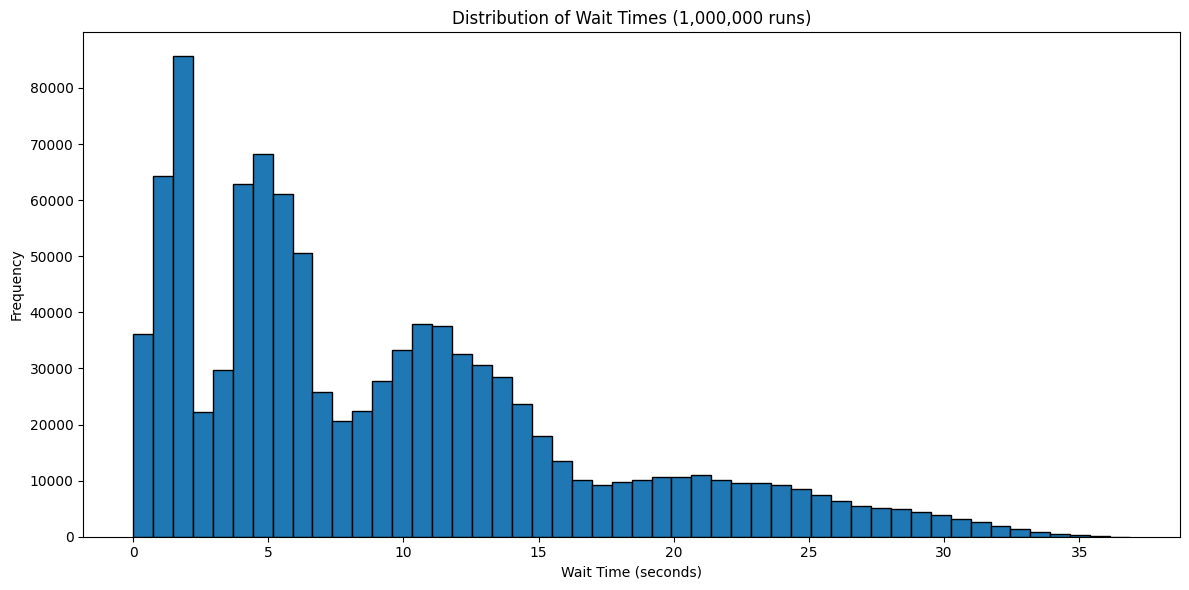

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def stacked_random_wait():
    total_wait = 0
    if random.random() > 0.8:
        total_wait += random.uniform(10, 20)
    if random.random() > 0.6:
        total_wait += random.uniform(5, 10)
    if random.random() > 0.4:
        total_wait += random.uniform(2, 5)
    if random.random() > 0.2:
        total_wait += random.uniform(1, 2)
    if random.random() <= 0.2:  # Note: changed to <= to match the original logic
        total_wait += random.uniform(0, 1)
    return total_wait

# Number of times to run the function
n_runs = 1_000_000

# Collect wait times
wait_times = [stacked_random_wait() for _ in tqdm(range(n_runs))]

# Create the plot
plt.figure(figsize=(12, 6))
plt.hist(wait_times, bins=50, edgecolor='black')
plt.title(f'Distribution of Wait Times ({n_runs:,} runs)')
plt.xlabel('Wait Time (seconds)')
plt.ylabel('Frequency')

# Print summary statistics
print(f"Mean wait time: {np.mean(wait_times):.2f} seconds")
print(f"Median wait time: {np.median(wait_times):.2f} seconds")
print(f"Standard deviation: {np.std(wait_times):.2f} seconds")
print(f"Minimum wait time: {min(wait_times):.2f} seconds")
print(f"Maximum wait time: {max(wait_times):.2f} seconds")

# Calculate probabilities for different ranges
ranges = [(0, 1), (1, 5), (5, 10), (10, 20), (20, np.inf)]
for start, end in ranges:
    prob = sum(start <= t < end for t in wait_times) / n_runs
    print(f"Probability of wait time between {start} and {end} seconds: {prob:.2%}")

plt.tight_layout()
plt.show()